# Forecasting Future Gains: Identifying Top 3 Investment Zipcodes in the Baltimore-Washington Area Using Zillow Time Series Data

- 07/18/24


### Introduction

In an era where data-driven decision-making is paramount, real estate investments stand to benefit significantly from advanced data science techniques. This project aims to leverage Zillow zipcode data to identify the top three zipcodes in the Baltimore-Washington area that promise the greatest return on investment (ROI) three years post-purchase. By employing the CRISP-DM (Cross Industry Standard Process for Data Mining) methodology, we will ensure a structured and thorough approach to our analysis, ensuring reliable and actionable insights for potential investors.



### CRISP-DM Overview

The CRISP-DM methodology consists of six major phases: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment. Each phase is integral to the success of the project and is described in detail below.

#### 1. Business Understanding

**Objective:**  
The primary objective of this project is to identify the top three zipcodes in the Baltimore-Washington area that are predicted to offer the highest return on investment (ROI) for home buyers over a three-year period. The purchase cost is negligible due to the

**Key Questions:**
- What zipcodes have shown the greatest increase in typical home value, as assessed by Zillow, in the Baltimore-Washington area over the last 5 years ?
    - Of these zipcodes, select the top `5-10` that showed the highest percent increase in home value over the past 5 years.
    - `Consider the invesement cost of these zipcodes`
- What are the top three zipcodes that show the highest potential for ROI when forecasting 3 years into the future?

**Success Criteria:**
- Identification of top three zipcodes with the highest predicted ROI.
- Development of a robust predictive model with high accuracy and reliability.



#### 2. Data Understanding

**Objective:**  
To gather and understand the data required for the analysis. This involves exploring Zillow's zipcode-level data and other relevant datasets.

**Tasks:**
- Collect Zillow data, including historical home prices, sales trends, and economic indicators for the Baltimore-Washington area.
- Explore additional data sources such as crime rates, school quality, and local amenities.
- Conduct initial data exploration to understand the distribution, trends, and potential issues within the data.

**Deliverables:**
- Data collection report detailing sources, data types, and initial findings.
- Exploratory data analysis (EDA) report with visualizations and summary statistics.



#### 3. Data Preparation

**Objective:**  
To clean, preprocess, and transform the data for analysis.

**Tasks:**
- Handle missing values, outliers, and inconsistencies in the data.
- Normalize and standardize numerical features.
- Encode categorical variables.
- Feature engineering to create new variables that may enhance the predictive power of the model.

**Deliverables:**
- Cleaned and preprocessed dataset ready for modeling.
- Feature engineering documentation.



#### 4. Modeling

**Objective:**  
To develop predictive models that can accurately forecast the ROI for different zipcodes.

**Tasks:**
- Select appropriate modeling techniques (e.g., linear regression, decision trees, ensemble methods).
- Train and validate models using historical data.
- Optimize model parameters and assess performance using metrics such as RMSE, MAE, and R-squared.

**Deliverables:**
- Trained predictive models.
- Model performance report with evaluation metrics.



#### 5. Evaluation

**Objective:**  
To evaluate the performance of the models and ensure they meet the business objectives.

**Tasks:**
- Compare model predictions with actual outcomes on a validation dataset.
- Conduct a detailed analysis of the top three zipcodes identified by the model.
- Assess the model's generalizability and potential for real-world application.

**Deliverables:**
- Evaluation report with insights on model accuracy and reliability.
- Recommendations for the top three zipcodes for investment.



#### 6. Deployment

**Objective:**  
To deploy the predictive model and communicate the results to stakeholders.

**Tasks:**
- Develop a dashboard or interactive tool for stakeholders to explore the results.
- Create documentation and user guides for the deployed solution.
- Present findings and recommendations to potential investors.

**Deliverables:**
- Interactive dashboard or web application.
- Final report and presentation summarizing the project outcomes and recommendations.


# Data Collection/Understanding

Certainly! Here's a step-by-step guide to using Zillow's typical home value datasets for your project:

### Step-by-Step Guide to Using Zillow's Typical Home Value Datasets

#### Step 1: Data Acquisition

**Objective:** Obtain the necessary Zillow home value data and other relevant datasets.

**Tasks:**
1. **Download Zillow Data:**
   - Visit the Zillow Research Data page: [Zillow Data](https://www.zillow.com/research/data/)
   - Look for datasets under "Home Values" such as "ZHVI Single Family Homes Time Series" or similar.
   - Download the relevant CSV files that contain historical home values at the zipcode level for the Baltimore-Washington area.

2. **Obtain Additional Data:**
   - Gather supplementary datasets that might affect home values, such as crime rates, school quality, economic indicators, etc.

#### Step 2: Data Understanding

**Objective:** Explore and understand the structure, content, and initial insights from the datasets.

### HOME VALUES

**Zillow Home Value Index (ZHVI):** A measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range. Available as a smoothed, seasonally adjusted measure and as a raw measure.

Zillow publishes top-tier ZHVI (\$, typical value for homes within the 65th to 95th percentile range for a given region) and bottom-tier ZHVI (\$, typical value for homes within the 5th to 35th percentile range for a given region).

Zillow also publishes ZHVI for all single-family residences (\$, typical value for all single-family homes in a given region), for condo/coops (\$), for all homes with 1, 2, 3, 4 and 5+ bedrooms (\$), and the ZHVI per square foot (\$, typical value of all homes per square foot calculated by taking the estimated home value for each home in a given region and dividing it by the home’s square footage).

**Note:** Starting with the January 2023 data release, and for all subsequent releases, the full ZHVI time series has been upgraded to harness the power of the [neural Zestimate](https://zillow.mediaroom.com/2021-06-15-Zillow-Launches-New-Neural-Zestimate,-Yielding-Major-Accuracy-Gains).

More information about what ZHVI is and how it’s calculated is available on [this overview page](https://www.zillow.com/research/methodology-neural-zhvi-32128). Here’s a handy [ZHVI User Guide](https://www.zillow.com/research/zhvi-user-guide/) for information about properly citing and making calculations with this metric.


![png](images/data-selection.png)

In [1]:
import pandas as pd
import pmdarima as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.api as tsa

In [3]:
# Load the dat
df_wide = pd.read_csv('data/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
df_wide

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,...,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,214724.296983,214910.658278,215408.637945,216414.449333,216450.427036,216293.377116,215517.905536,215551.319129,215316.236279,215698.702578,216579.726990,217767.477052,218497.161271,218196.654681,217471.743252,216694.526939,217386.392692,218675.051006,219877.443826,220475.579196,220384.923770,220404.068090,220084.726993,219325.359638,218669.709006,218214.254258,218629.597164,219216.533807,220170.716028,221013.838568,221195.843670,...,366612.531341,373583.970573,381469.766790,389668.380745,397377.628707,403989.662854,409461.750857,414704.392031,420563.904695,426738.557214,434214.243029,442770.469773,453537.304121,465438.661821,477515.567608,488071.330980,494343.746552,495587.044468,493234.492915,490249.245724,487992.683777,486434.884100,484183.058931,482856.775673,481800.309078,483035.439016,485079.366148,488267.643219,491119.518370,493649.146548,495508.468732,496775.273604,497480.808242,498108.355423,499513.840126,501722.478754,504594.794999,507170.130369,508512.211208,508825.477602
1,61148,2,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,137728.299476,138296.743080,138680.950047,139654.304660,140666.948063,141854.501515,142952.035640,144110.124491,145556.103703,147245.546101,149001.855112,150519.482146,151855.094103,153324.346537,154970.708372,156617.920652,157954.442553,159194.427453,160655.175964,162388.565377,164461.465645,166419.914990,168054.090497,169235.328367,170457.958416,172002.880891,173797.081749,175832.904026,177863.998201,180226.723702,182893.369138,...,375126.253083,380729.673580,387692.999821,395804.970306,402847.553927,409095.212643,414730.241316,421534.167444,429070.003557,436575.871460,446068.946300,457009.887330,469861.901592,481504.526236,492005.016717,501886.176887,509621.152226,514764.144452,517020.870296,518938.817021,521753.416814,524753.720028,527122.146197,529339.520935,532235.008178,536399.430646,541773.381352,547728.302434,553853.213601,559764.338843,566107.250697,573469.272028,580290.890399,585073.452329,586662.044177,589227.402896,594340.234957,602667.273772,610030.631370,615467.664218
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,104976.099896,104990.605342,104861.748571,104851.890700,104899.755364,105094.507557,105285.231681,105526.238920,105890.048353,106187.075484,106592.301638,106991.283615,107069.787716,106895.489164,106419.664205,106173.721904,106169.643967,106303.393317,106466.942102,106382.761477,106409.791055,106547.470116,106788.315227,106937.612166,106999.712136,107086.089061,107457.270030,107998.052655,108550.082050,109009.142450,109506.031757,...,216116.898187,219276.843976,223126.506228,227632.370614,231939.541757,235636.292131,238749.131587,242121.478937,245874.577846,249810.356724,254755.379275,260538.589780,267248.175008,273977.834787,280478.502334,286373.925125,290681.264039,292748.254931,292917.095252,291908.429868,290503.531088,288418.798529,285949.641537,283569.970988,281682.450364,280468.663229,279981.219326,280366.158239,281139.099024,282049.947246,282592.165439,282581.794

In [6]:
df_wide['Metro'].value_counts().head(20)

New York-Newark-Jersey City, NY-NJ-PA           830
Chicago-Naperville-Elgin, IL-IN-WI              376
Los Angeles-Long Beach-Anaheim, CA              360
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD     334
Washington-Arlington-Alexandria, DC-VA-MD-WV    314
Pittsburgh, PA                                  296
Boston-Cambridge-Newton, MA-NH                  272
Dallas-Fort Worth-Arlington, TX                 251
Houston-The Woodlands-Sugar Land, TX            219
Minneapolis-St. Paul-Bloomington, MN-WI         217
Detroit-Warren-Dearborn, MI                     213
St. Louis, MO-IL                                211
Atlanta-Sandy Springs-Alpharetta, GA            203
Kansas City, MO-KS                              183
Miami-Fort Lauderdale-Pompano Beach, FL         181
San Francisco-Oakland-Berkeley, CA              166
Seattle-Tacoma-Bellevue, WA                     156
Cincinnati, OH-KY-IN                            149
Phoenix-Mesa-Chandler, AZ                       149
Baltimore-Co

In [8]:
metro_regions = ("Washington-Arlington-Alexandria, DC-VA-MD-WV", "Baltimore-Columbia-Towson, MD")
filter_metro = df_wide['Metro'].isin(metro_regions)
df_wide = df_wide.loc[filter_metro]
df_wide

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,...,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30
78,67182,80,22193,zip,VA,VA,Woodbridge,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Prince William County,150722.185246,151208.853995,151606.991490,152107.546507,152491.787409,152838.381988,153814.306360,154882.640773,156319.523882,157449.305085,158732.417403,160186.430980,161626.781173,162904.838282,164042.469526,165581.081585,167837.593039,170593.547900,173622.949446,176563.111478,179346.251939,182101.457981,184586.916909,186812.317249,188861.620965,190948.386303,193082.870021,195154.422349,197625.094952,200364.162529,203443.755491,...,406722.911379,412802.229622,418790.103963,423921.766471,427085.252066,428059.077435,427427.740724,427207.661676,427724.379746,429949.967528,434241.687346,440579.930535,448524.195432,456230.710246,462525.129045,466071.424485,466627.192557,464537.543337,461214.140315,458654.793099,456941.284406,455852.011477,455226.153710,455820.489399,456835.037093,458166.064357,459626.152129,462118.269735,464879.142804,467719.948543,469994.678661,471728.354561,472879.215479,473899.597515,474834.223816,476626.657659,479792.310573,484216.538553,488417.494205,491351.596144
159,67180,165,22191,zip,VA,VA,Woodbridge,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Prince William County,152074.973318,152540.753272,153014.908455,153642.975528,154490.022177,155317.561576,156616.710110,157610.309797,158867.895337,159946.687410,161237.701782,162745.366793,164196.331266,165554.026659,166727.855235,168386.236500,170686.329891,173269.719033,176172.341139,179167.484705,182222.053208,185254.223099,187962.467597,190397.115836,192534.883946,194697.351875,197112.525494,199535.096769,202246.188558,205139.334573,208347.092944,...,388983.278042,394312.499789,400057.285314,405245.873300,408771.296261,410335.367146,410271.442719,410610.747792,411456.784149,413644.888600,417221.968240,422269.022817,428777.629812,435395.955417,440994.369891,444183.643548,444655.461060,443060.591699,440620.905010,439165.300845,438410.001051,437767.754674,437093.301624,437011.779295,437737.035109,438914.449519,440608.460843,443193.687655,446262.080670,449353.267457,451844.195953,453673.566444,454793.268411,455588.986737,456272.526695,457781.412332,460624.712297,464290.950403,467623.303339,469785.439440
168,66126,174,20002,zip,DC,DC,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",District of Columbia,142819.862432,143555.418969,144133.531367,145165.754895,146840.436350,148987.006355,151306.349986,152580.412300,153456.967209,153708.467687,154026.150781,154520.029408,155298.388408,155992.814232,156824.642141,157898.723611,159084.742756,160387.465906,161899.291580,164022.103570,165748.458689,167716.908227,169553.479701,171343.292246,172701.475075,173624.596738,174740.270706,176344.206164,178546.485996,180845.939346,183700.933470,...,693110.923520,698076.046312,704022.315808,709917.412525,712761.391688,711954.015242,708750.520925,706415.973995,705081.571892,703566.231504,703051.132089,705611.466110,712447.166815,719803.797718,724242.698282,724187.400625,719496.849889,712069.564237,702649.947837,695894.626432,690935.875326,686786.816093,682430.326678,679155.913096,676796.503410,675249.977620,673927.0270

In [13]:
# Filter for Maryland
df_md = df_wide.loc[df_wide['State'] == 'MD']
df_md['RegionName'] = df_md['RegionName'].astype(str)

# Save the zipcodes
zipcodes = df_md['RegionName'].unique()
len(zipcodes)

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_4630/2907951597.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_md['RegionName'] = df_md['RegionName'].astype(str)


281

- There are 281 zipcodes located within MD's Baltimore/DC Metro regions.

## Convert Time Series to Long Form

In [18]:
for i, val in enumerate(df_md.columns):
    print(f"{i}) {val}")

0) RegionID
1) SizeRank
2) RegionName
3) RegionType
4) StateName
5) State
6) City
7) Metro
8) CountyName
9) 2000-01-31
10) 2000-02-29
11) 2000-03-31
12) 2000-04-30
13) 2000-05-31
14) 2000-06-30
15) 2000-07-31
16) 2000-08-31
17) 2000-09-30
18) 2000-10-31
19) 2000-11-30
20) 2000-12-31
21) 2001-01-31
22) 2001-02-28
23) 2001-03-31
24) 2001-04-30
25) 2001-05-31
26) 2001-06-30
27) 2001-07-31
28) 2001-08-31
29) 2001-09-30
30) 2001-10-31
31) 2001-11-30
32) 2001-12-31
33) 2002-01-31
34) 2002-02-28
35) 2002-03-31
36) 2002-04-30
37) 2002-05-31
38) 2002-06-30
39) 2002-07-31
40) 2002-08-31
41) 2002-09-30
42) 2002-10-31
43) 2002-11-30
44) 2002-12-31
45) 2003-01-31
46) 2003-02-28
47) 2003-03-31
48) 2003-04-30
49) 2003-05-31
50) 2003-06-30
51) 2003-07-31
52) 2003-08-31
53) 2003-09-30
54) 2003-10-31
55) 2003-11-30
56) 2003-12-31
57) 2004-01-31
58) 2004-02-29
59) 2004-03-31
60) 2004-04-30
61) 2004-05-31
62) 2004-06-30
63) 2004-07-31
64) 2004-08-31
65) 2004-09-30
66) 2004-10-31
67) 2004-11-30
68) 2004-12

In [24]:
id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName']
value_cols=  df_md.columns[6:]

df = pd.melt(df_md, id_vars=id_vars , value_vars=value_cols, var_name='Month', value_name='HomeValue')
df

,RegionName,City,State,Metro,CountyName,Month,HomeValue
0,20906,Silver Spring,MD,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Montgomery County,2000-01-31,1.636624e+05
1,21234,Parkville,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,2000-01-31,1.148036e+05
2,20878,Gaithersburg,MD,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Montgomery County,2000-01-31,2.533091e+05
3,20874,Germantown,MD,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Montgomery County,2000-01-31,1.509697e+05
4,21117,Owings Mills,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,2000-01-31,1.610868e+05
...,...,...,...,...,...,...,...
82609,21051,Hydes,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,2024-06-30,5.278740e+05
82610,20812,Glen Echo,MD,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Montgomery County,2024-06-30,1.266162e+06
82611,21762,Union Bridge,MD,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Frederick County,2024-06-30,3.307898e+05
82612,21052,Fort Howard,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,2024-06-30,3.262458e+05


In [25]:
df['CountyName'].value_counts()

Montgomery County        12936
Baltimore County         11172
Anne Arundel County       9996
Prince Georges County     9702
Frederick County          6762
Charles County            6174
Baltimore City            5586
Howard County             5586
Harford County            4704
Calvert County            3822
Queen Annes County        3234
Carroll County            2940
Name: CountyName, dtype: int64

In [30]:
## Process as time series
df['Month'] = pd.to_datetime(df['Month'])#, format='%Y-%m')
df


,RegionName,City,State,Metro,CountyName,Month,HomeValue
0,20906,Silver Spring,MD,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Montgomery County,2000-01-31,1.636624e+05
1,21234,Parkville,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,2000-01-31,1.148036e+05
2,20878,Gaithersburg,MD,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Montgomery County,2000-01-31,2.533091e+05
3,20874,Germantown,MD,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Montgomery County,2000-01-31,1.509697e+05
4,21117,Owings Mills,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,2000-01-31,1.610868e+05
...,...,...,...,...,...,...,...
82609,21051,Hydes,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,2024-06-30,5.278740e+05
82610,20812,Glen Echo,MD,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Montgomery County,2024-06-30,1.266162e+06
82611,21762,Union Bridge,MD,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Frederick County,2024-06-30,3.307898e+05
82612,21052,Fort Howard,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,2024-06-30,3.262458e+05


In [38]:
df_ts = df.set_index(['RegionName', 'Month'])
df_ts = df_ts['HomeValue'].unstack(level=0)#.plot(legend=False, figsize=(12, 6))
df_ts

RegionName,20601,20602,20603,20607,20608,20611,20612,20613,20615,20616,20617,20622,20623,20625,20629,20632,20637,20639,20640,20645,20646,20657,20658,20662,20664,20675,20676,20677,20678,20685,20688,20689,20693,20695,20705,20706,20707,20708,20710,20711,...,21623,21628,21638,21651,21657,21658,21666,21668,21701,21702,21703,21704,21710,21716,21723,21727,21737,21738,21754,21755,21757,21758,21762,21769,21770,21771,21773,21774,21776,21777,21778,21780,21784,21787,21788,21791,21793,21794,21797,21798
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-31,171919.785078,139128.334503,188899.959888,227263.649189,162252.439039,182756.374355,NaN,206038.738603,NaN,178515.370644,230025.139444,215566.525122,184774.062475,141787.784165,201657.218835,NaN,231057.754975,229497.986329,146534.316950,209079.519565,196574.928282,130106.338921,144508.032454,139381.135437,158112.971107,199719.962084,172540.232370,247684.869189,186928.195304,164709.283980,188915.949292,209871.800552,205494.131445,208569.642748,146595.768210,152068.436089,146366.684495,159504.050249,90271.087614,246354.849729,...,158613.735147,143764.558852,217190.657263,123236.632680,156594.145760,263089.386928,216119.312250,144464.023296,157153.728701,161509.797576,146195.442469,241859.183804,238696.689026,141235.453747,320859.333602,151698.376408,4.058218e+05,327661.161089,236526.266902,197329.448113,149804.845217,171811.558112,NaN,194526.632052,237480.827063,208630.470157,183571.581376,195765.473519,170817.847701,183572.248641,173192.376503,159769.632506,191125.727842,151242.878908,134075.292937,156695.050853,155421.955997,3.450278e+05,266828.885208,170176.720097
2000-02-29,172009.486335,139031.505262,188845.106047,226669.844031,160996.536994,182909.528737,NaN,205781.044948,NaN,178468.752999,229906.423814,215362.521850,184588.390561,141094.046952,201912.397594,NaN,231161.235177,228998.218616,146479.855691,207137.328621,196455.714651,130085.847013,144569.979656,141234.475739,158290.979750,199775.047467,172534.035349,247247.677129,187061.794625,165072.943762,189368.936817,209890.438594,206217.750788,208435.345676,146558.797195,151821.773794,146197.905849,159348.606994,90045.164939,246794.671327,...,158684.899878,143281.932401,217401.170712,123035.721375,156633.657402,263237.331000,216375.291771,144984.378115,157136.785103,161381.685037,146242.412181,242130.169318,238842.372694,140904.830950,322154.930099,151602.955121,4.060827e+05,328984.196671,236602.217612,197519.822096,149896.412752,171881.899754,NaN,194357.405525,237465.535649,208791.645984,183277.849137,195700.272865,171165.516373,183788.206841,173655.048574,160018.544215,191145.628393,151400.224340,134267.398270,156714.444996,155134.725496,3.452601e+05,267525.746221,169771.309663
2000-03-31,172342.499785,139225.168544,188988.549654,226446.312119,160427.370081,183113.853278,NaN,205728.515414,NaN,178568.430810,229760.377801,215070.508414,184469.161982,140706.581043,202310.923621,NaN,231535.528652,229067.361044,146682.065414,207583.419301,196553.818955,130248.356534,145043.898163,142416.753130,158375.139295,199774.543047,172720.089944,247203.965346,187196.179850,165369.290298,189890.416305,209959.269622,206878.717073,208694.873681,146518.044018,151674.553606,146160.868930,159189.038140,89801.847399,247810.617874,...,158671.654696,143346.866357,217869.749618,123291.817527,156809.799345,263767.789931,216618.815314,145042.345919,157235.880404,161457.203237,146383.195564,242576.773080,239310.196161,140998.937279,322191.938827,151708.840461,4.062529e+05,329634.468406,236620.742217,197767.891570,150098.082707,171997.354381,NaN,194325.412611,237352.724156,208951.371645,183256.201223,195764.394172,171306.695813,183896.052256,173229.737880,159627.356229,191238.078406,151807.509753,134326.785554,156972.415670,155205.652855,3.457071e+05,267588.245616,169500.048425
2000-04-30,172990.719516,139601.597772,189403.366509,225968.230758,159390.467228,183399.832185,NaN,205363.962195,NaN,179029.821237,229437.6269

In [39]:
df_ts.columns.name =  None
df_ts

,20601,20602,20603,20607,20608,20611,20612,20613,20615,20616,20617,20622,20623,20625,20629,20632,20637,20639,20640,20645,20646,20657,20658,20662,20664,20675,20676,20677,20678,20685,20688,20689,20693,20695,20705,20706,20707,20708,20710,20711,...,21623,21628,21638,21651,21657,21658,21666,21668,21701,21702,21703,21704,21710,21716,21723,21727,21737,21738,21754,21755,21757,21758,21762,21769,21770,21771,21773,21774,21776,21777,21778,21780,21784,21787,21788,21791,21793,21794,21797,21798
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-31,171919.785078,139128.334503,188899.959888,227263.649189,162252.439039,182756.374355,NaN,206038.738603,NaN,178515.370644,230025.139444,215566.525122,184774.062475,141787.784165,201657.218835,NaN,231057.754975,229497.986329,146534.316950,209079.519565,196574.928282,130106.338921,144508.032454,139381.135437,158112.971107,199719.962084,172540.232370,247684.869189,186928.195304,164709.283980,188915.949292,209871.800552,205494.131445,208569.642748,146595.768210,152068.436089,146366.684495,159504.050249,90271.087614,246354.849729,...,158613.735147,143764.558852,217190.657263,123236.632680,156594.145760,263089.386928,216119.312250,144464.023296,157153.728701,161509.797576,146195.442469,241859.183804,238696.689026,141235.453747,320859.333602,151698.376408,4.058218e+05,327661.161089,236526.266902,197329.448113,149804.845217,171811.558112,NaN,194526.632052,237480.827063,208630.470157,183571.581376,195765.473519,170817.847701,183572.248641,173192.376503,159769.632506,191125.727842,151242.878908,134075.292937,156695.050853,155421.955997,3.450278e+05,266828.885208,170176.720097
2000-02-29,172009.486335,139031.505262,188845.106047,226669.844031,160996.536994,182909.528737,NaN,205781.044948,NaN,178468.752999,229906.423814,215362.521850,184588.390561,141094.046952,201912.397594,NaN,231161.235177,228998.218616,146479.855691,207137.328621,196455.714651,130085.847013,144569.979656,141234.475739,158290.979750,199775.047467,172534.035349,247247.677129,187061.794625,165072.943762,189368.936817,209890.438594,206217.750788,208435.345676,146558.797195,151821.773794,146197.905849,159348.606994,90045.164939,246794.671327,...,158684.899878,143281.932401,217401.170712,123035.721375,156633.657402,263237.331000,216375.291771,144984.378115,157136.785103,161381.685037,146242.412181,242130.169318,238842.372694,140904.830950,322154.930099,151602.955121,4.060827e+05,328984.196671,236602.217612,197519.822096,149896.412752,171881.899754,NaN,194357.405525,237465.535649,208791.645984,183277.849137,195700.272865,171165.516373,183788.206841,173655.048574,160018.544215,191145.628393,151400.224340,134267.398270,156714.444996,155134.725496,3.452601e+05,267525.746221,169771.309663
2000-03-31,172342.499785,139225.168544,188988.549654,226446.312119,160427.370081,183113.853278,NaN,205728.515414,NaN,178568.430810,229760.377801,215070.508414,184469.161982,140706.581043,202310.923621,NaN,231535.528652,229067.361044,146682.065414,207583.419301,196553.818955,130248.356534,145043.898163,142416.753130,158375.139295,199774.543047,172720.089944,247203.965346,187196.179850,165369.290298,189890.416305,209959.269622,206878.717073,208694.873681,146518.044018,151674.553606,146160.868930,159189.038140,89801.847399,247810.617874,...,158671.654696,143346.866357,217869.749618,123291.817527,156809.799345,263767.789931,216618.815314,145042.345919,157235.880404,161457.203237,146383.195564,242576.773080,239310.196161,140998.937279,322191.938827,151708.840461,4.062529e+05,329634.468406,236620.742217,197767.891570,150098.082707,171997.354381,NaN,194325.412611,237352.724156,208951.371645,183256.201223,195764.394172,171306.695813,183896.052256,173229.737880,159627.356229,191238.078406,151807.509753,134326.785554,156972.415670,155205.652855,3.457071e+05,267588.245616,169500.048425
2000-04-30,172990.719516,139601.597772,189403.366509,225968.230758,159390.467228,183399.832185,NaN,205363.962195,NaN,179029.821237,229437.626988,215306.

In [44]:
### Save the data 
df_ts.to_csv('data/MD_Zip_HomeValue.csv.gz', compression='gzip')
df_ts = pd.read_csv('data/MD_Zip_HomeValue.csv.gz', index_col=0, parse_dates=['Month'])
df_ts

,20601,20602,20603,20607,20608,20611,20612,20613,20615,20616,20617,20622,20623,20625,20629,20632,20637,20639,20640,20645,20646,20657,20658,20662,20664,20675,20676,20677,20678,20685,20688,20689,20693,20695,20705,20706,20707,20708,20710,20711,...,21623,21628,21638,21651,21657,21658,21666,21668,21701,21702,21703,21704,21710,21716,21723,21727,21737,21738,21754,21755,21757,21758,21762,21769,21770,21771,21773,21774,21776,21777,21778,21780,21784,21787,21788,21791,21793,21794,21797,21798
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-31,171919.785078,139128.334503,188899.959888,227263.649189,162252.439039,182756.374355,NaN,206038.738603,NaN,178515.370644,230025.139444,215566.525122,184774.062475,141787.784165,201657.218835,NaN,231057.754975,229497.986329,146534.316950,209079.519565,196574.928282,130106.338921,144508.032454,139381.135437,158112.971107,199719.962084,172540.232370,247684.869189,186928.195304,164709.283980,188915.949292,209871.800552,205494.131445,208569.642748,146595.768210,152068.436089,146366.684495,159504.050249,90271.087614,246354.849729,...,158613.735147,143764.558852,217190.657263,123236.632680,156594.145760,263089.386928,216119.312250,144464.023296,157153.728701,161509.797576,146195.442469,241859.183804,238696.689026,141235.453747,320859.333602,151698.376408,4.058218e+05,327661.161089,236526.266902,197329.448113,149804.845217,171811.558112,NaN,194526.632052,237480.827063,208630.470157,183571.581376,195765.473519,170817.847701,183572.248641,173192.376503,159769.632506,191125.727842,151242.878908,134075.292937,156695.050853,155421.955997,3.450278e+05,266828.885208,170176.720097
2000-02-29,172009.486335,139031.505262,188845.106047,226669.844031,160996.536994,182909.528737,NaN,205781.044948,NaN,178468.752999,229906.423814,215362.521850,184588.390561,141094.046952,201912.397594,NaN,231161.235177,228998.218616,146479.855691,207137.328621,196455.714651,130085.847013,144569.979656,141234.475739,158290.979750,199775.047467,172534.035349,247247.677129,187061.794625,165072.943762,189368.936817,209890.438594,206217.750788,208435.345676,146558.797195,151821.773794,146197.905849,159348.606994,90045.164939,246794.671327,...,158684.899878,143281.932401,217401.170712,123035.721375,156633.657402,263237.331000,216375.291771,144984.378115,157136.785103,161381.685037,146242.412181,242130.169318,238842.372694,140904.830950,322154.930099,151602.955121,4.060827e+05,328984.196671,236602.217612,197519.822096,149896.412752,171881.899754,NaN,194357.405525,237465.535649,208791.645984,183277.849137,195700.272865,171165.516373,183788.206841,173655.048574,160018.544215,191145.628393,151400.224340,134267.398270,156714.444996,155134.725496,3.452601e+05,267525.746221,169771.309663
2000-03-31,172342.499785,139225.168544,188988.549654,226446.312119,160427.370081,183113.853278,NaN,205728.515414,NaN,178568.430810,229760.377801,215070.508414,184469.161982,140706.581043,202310.923621,NaN,231535.528652,229067.361044,146682.065414,207583.419301,196553.818955,130248.356534,145043.898163,142416.753130,158375.139295,199774.543047,172720.089944,247203.965346,187196.179850,165369.290298,189890.416305,209959.269622,206878.717073,208694.873681,146518.044018,151674.553606,146160.868930,159189.038140,89801.847399,247810.617874,...,158671.654696,143346.866357,217869.749618,123291.817527,156809.799345,263767.789931,216618.815314,145042.345919,157235.880404,161457.203237,146383.195564,242576.773080,239310.196161,140998.937279,322191.938827,151708.840461,4.062529e+05,329634.468406,236620.742217,197767.891570,150098.082707,171997.354381,NaN,194325.412611,237352.724156,208951.371645,183256.201223,195764.394172,171306.695813,183896.052256,173229.737880,159627.356229,191238.078406,151807.509753,134326.785554,156972.415670,155205.652855,3.457071e+05,267588.245616,169500.048425
2000-04-30,172990.719516,139601.597772,189403.366509,225968.230758,159390.467228,183399.832185,NaN,205363.962195,NaN,179029.821237,229437.626988,215306.

In [50]:
# Save the start and end date
start_date = df_ts.index[0] 
last_date = df_ts.index[-1]
print(f"{start_date} -  {last_date}")   

2000-01-31 00:00:00 -  2024-06-30 00:00:00


In [53]:
# Calculate pct_change in home value for the last 5 years
time_period = df_ts.index[-(5 * 12)]
time_period

Timestamp('2019-07-31 00:00:00')

In [55]:
# Calculate percent change over last 5 years
df_ts_pct_change = df_ts.loc[time_period:].pct_change()
df_ts_pct_change

,20601,20602,20603,20607,20608,20611,20612,20613,20615,20616,20617,20622,20623,20625,20629,20632,20637,20639,20640,20645,20646,20657,20658,20662,20664,20675,20676,20677,20678,20685,20688,20689,20693,20695,20705,20706,20707,20708,20710,20711,...,21623,21628,21638,21651,21657,21658,21666,21668,21701,21702,21703,21704,21710,21716,21723,21727,21737,21738,21754,21755,21757,21758,21762,21769,21770,21771,21773,21774,21776,21777,21778,21780,21784,21787,21788,21791,21793,21794,21797,21798
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-31,0.002765,0.003819,0.002250,0.005923,0.008822,0.003724,NaN,0.002627,NaN,0.001012,0.001646,0.003603,0.003130,0.001526,-0.001202,NaN,0.001676,0.003946,0.003387,0.002343,0.000941,0.004249,0.003787,0.003994,0.004056,0.001073,0.001653,0.001816,0.004275,0.001571,0.002299,0.003665,0.003825,0.000008,0.001445,0.003207,0.003107,0.003247,0.004757,0.001219,...,0.003910,0.003139,0.000214,0.005362,0.006575,0.000755,0.000509,0.002631,-0.000046,0.000356,-0.000023,0.000971,0.000558,0.003785,-0.001687,0.002703,0.000312,0.000120,0.000171,0.000550,0.003866,0.003189,NaN,0.000250,-0.000843,0.001486,0.003128,0.000082,0.002985,0.001164,0.005681,0.003675,0.000772,0.002064,-0.000595,0.001152,-0.000251,0.001321,-0.000639,0.000767
2019-09-30,0.002364,0.003959,0.001964,0.006481,0.004626,0.001132,NaN,0.000918,NaN,0.000042,-0.000851,0.002230,0.000729,0.002120,-0.001170,NaN,0.000457,0.002396,0.000673,0.002212,-0.000392,0.002181,-0.002127,-0.001240,0.001535,0.001411,0.000685,0.000108,0.003167,0.001468,0.000723,0.002427,0.001930,0.000537,0.002136,0.002923,0.002980,0.002938,0.003810,0.001587,...,0.000960,0.000330,0.001482,0.002659,0.005008,0.002434,-0.000177,-0.001322,-0.000689,0.000485,0.000074,0.001704,0.001090,0.004022,-0.002491,0.001159,-0.001343,-0.000401,0.001523,0.001464,0.004479,0.004054,NaN,0.000165,-0.000048,0.001157,0.002126,0.000152,0.004817,0.002853,0.004419,0.002350,0.000859,0.001254,-0.000131,0.001498,-0.000301,0.000230,-0.000396,0.001084
2019-10-31,0.001232,0.004218,0.001432,0.006160,0.001575,-0.001497,NaN,0.000266,NaN,0.000886,-0.002506,0.000796,0.000671,0.001606,0.000005,NaN,-0.000496,0.002720,0.000089,0.002873,-0.001153,0.001023,-0.004127,-0.003247,-0.001087,-0.000211,0.000194,0.000084,0.002876,0.000867,0.000509,0.001868,0.001721,0.000807,0.000906,0.002633,0.003055,0.002558,0.001507,-0.000038,...,-0.000170,-0.000250,0.001960,0.002048,0.002565,0.002598,-0.001619,-0.002751,-0.000256,0.000636,0.000588,0.002102,0.001412,0.005415,-0.000904,-0.002455,-0.001495,0.000038,0.002626,0.001735,0.003390,0.004934,NaN,-0.000645,0.000632,0.001405,0.000055,0.001117,0.005618,0.003144,-0.001211,0.001381,0.001049,0.000102,-0.001874,0.001290,-0.000220,0.000215,0.000453,0.002109
2019-11-30,0.001294,0.004499,0.001999,0.004668,-0.000805,-0.001170,NaN,0.001187,NaN,0.001759,-0.001301,0.001567,0.002429,0.000626,0.000168,NaN,-0.000058,0.002613,0.000646,0.002341,0.000705,0.003167,-0.001774,-0.000822,-0.001014,0.000997,0.001914,0.000453,0.002407,0.002293,0.001787,0.001769,0.002539,0.002468,0.001506,0.004166,0.004542,0.003269,0.003141,-0.000017,...,0.001951,0.001743,0.004105,0.003336,0.002078,0.003392,0.000152,-0.000990,0.000264,0.001073,0.001638,0.001919,0.000728,0.004709,-0.000445,-0.001165,-0.001953,0.000202,0.002538,0.001760,0.002419,0.005533,NaN,-0.001176,-0.000440,0.001241,-0.000792,0.001376,0.005700,0.003326,-0.003413,0.001981,0.001065,0.000998,-0.000012,0.002172,0.000644,-0.000206,0.000228,0.002268
2019-12-31,0.002613,0.004584,0.003060,0.003839,-0.001278,0.001004,NaN,0.002677,NaN,0.003258,0.001568,0.002783,0.003645,0.001677,0.002910,NaN,0.001934,0.004558,0.002255,0.0

In [59]:
# Rank the zipcodes by change from first to last date
pct_change_5yrs = df_ts_pct_change.iloc[-1]
pct_change_5yrs


20601    0.002355
20602    0.002524
20603    0.001165
20607    0.000657
20608    0.001788
           ...   
21791    0.003670
21793    0.002574
21794    0.002869
21797    0.003744
21798    0.003128
Name: 2024-06-30 00:00:00, Length: 281, dtype: float64

In [63]:
# Rank the zipcodes by change from first to last date
ranked_zipcodes = pct_change_5yrs.rank(ascending=False)#axis=1, method='first', ascending=False)
top_zipcodes = ranked_zipcodes.sort_values().head(10)
top_zipcodes

20818     1.0
21628     2.0
20625     3.0
21737     4.0
21780     5.0
21223     6.0
21651     7.0
21405     8.0
20854     9.0
21770    10.0
Name: 2024-06-30 00:00:00, dtype: float64

In [64]:
# Filter for top_zipcodes
df_ts_top = df_ts[top_zipcodes.index]
df_ts_top

,20818,21628,20625,21737,21780,21223,21651,21405,20854,21770
Month,,,,,,,,,,
2000-01-31,4.270785e+05,143764.558852,141787.784165,4.058218e+05,159769.632506,42500.587852,123236.632680,3.752515e+05,4.880641e+05,237480.827063
2000-02-29,4.270950e+05,143281.932401,141094.046952,4.060827e+05,160018.544215,42564.625700,123035.721375,3.753901e+05,4.880798e+05,237465.535649
2000-03-31,4.283884e+05,143346.866357,140706.581043,4.062529e+05,159627.356229,42630.902836,123291.817527,3.770869e+05,4.886516e+05,237352.724156
2000-04-30,4.310397e+05,143380.134580,140643.895607,4.080033e+05,159747.838667,42770.649231,123802.211045,3.790833e+05,4.905660e+05,237599.199000
2000-05-31,4.350303e+05,144523.862544,141722.375737,4.093455e+05,160212.398766,43027.393634,124636.402287,3.808133e+05,4.942631e+05,238422.427999
...,...,...,...,...,...,...,...,...,...,...
2024-02-29,1.206753e+06,305837.522671,348753.830706,1.124104e+06,358556.510078,61817.612275,319050.755805,1.376929e+06,1.206452e+06,634752.320688
2024-03-31,1.216901e+06,308240.516525,350256.243133,1.133509e+06,361366.769494,61912.564974,320862.075721,1.385121e+06,1.218982e+06,639066.757896
2024-04-30,1.232159e+06,311978.304931,352721.385795,1.147535e+06,365982.827730,62317.981049,323878.710068,1.396243e+06,1.237155e+06,645540.609380


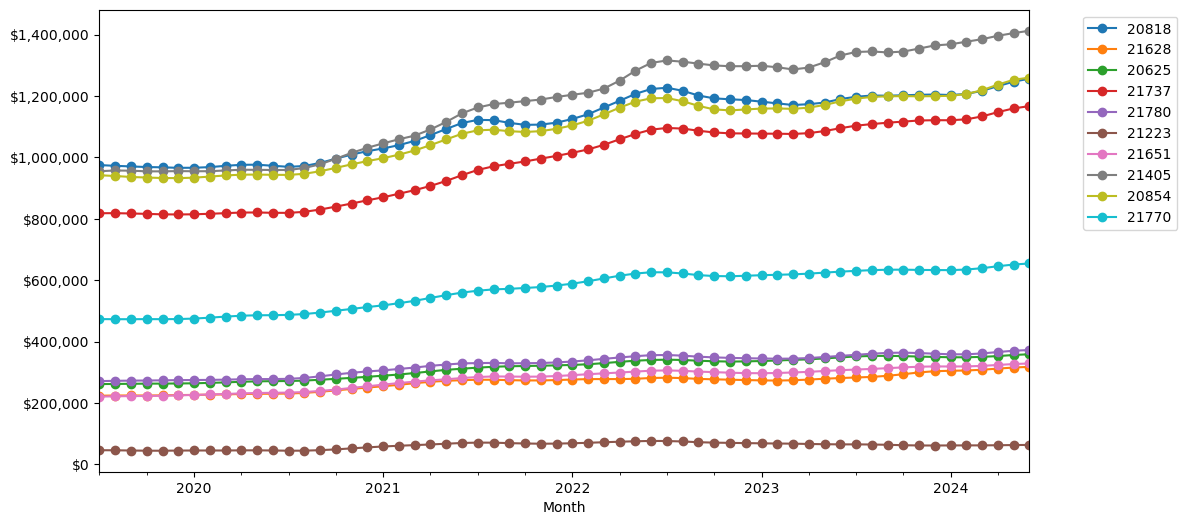

In [75]:
# Visualize Change in Value over last 5 years
ax = df_ts_top.loc[time_period:].plot(legend=False, figsize=(12, 6), style='-o')
ax.legend(bbox_to_anchor=(1.05, 1))

# Format price values as currency
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

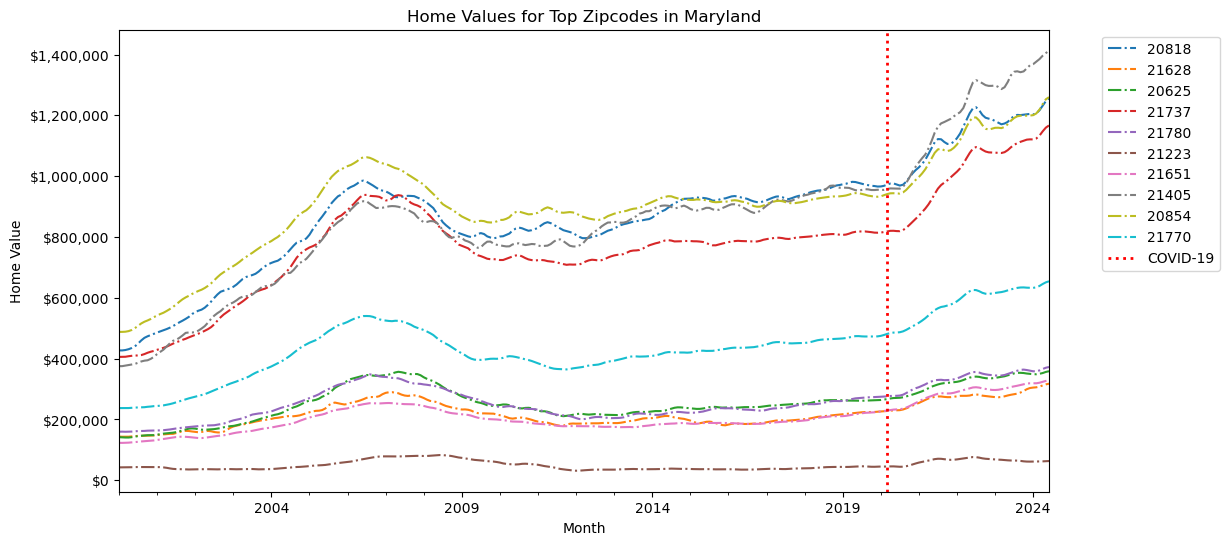

In [89]:
# Visualize HomeValues for selected zipcodes
ax = df_ts_top.plot(legend=False, figsize=(12, 6), style='-.')

# Format price values as currency
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

# Annotate start of covid
ax.axvline(x='2020-03-01', color='r', linestyle=':', lw=2, label='COVID-19')
ax.legend(bbox_to_anchor=(1.05, 1))
ax.set(title='Home Values for Top Zipcodes in Maryland', ylabel='Home Value');


- We can clearly see that there awas a shift in the slope for increasing house prices sometime after the start of the COVID19 pandemic.

### Average Home Prices - First Half 2024

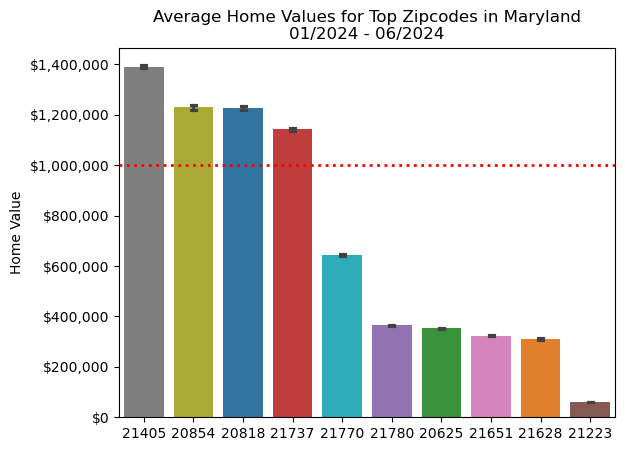

In [102]:
# Visualize HomeValues for selected zipcodes
plot_df = df_ts_top.loc['01-2024':'06-2024']
avg_home_values = plot_df.mean().sort_values(ascending=False)

ax = sns.barplot(data=plot_df, errorbar=('ci',68), capsize=0.1, order=avg_home_values.index)

# Format price values as currency
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
ax.set(title='Average Home Values for Top Zipcodes in Maryland\n01/2024 - 06/2024', ylabel='Home Value');
ax.axhline(y=1_000_000, color='r', linestyle=':', lw=2, label='Investment Cutoff')

### TO DO: Decide if Stakeholder wants to limit investment cost to < $1M

- If the stakeholder wants to keep investment costs below $1M, eliminate zipcodes with 2024 average > 1M

In [105]:
selected_zipcodes = avg_home_values[avg_home_values < 1_000_000]
selected_zipcodes

21770    642925.359861
21780    364521.669887
20625    352629.513395
21651    323038.798932
21628    310691.242889
21223     62341.853357
dtype: float64

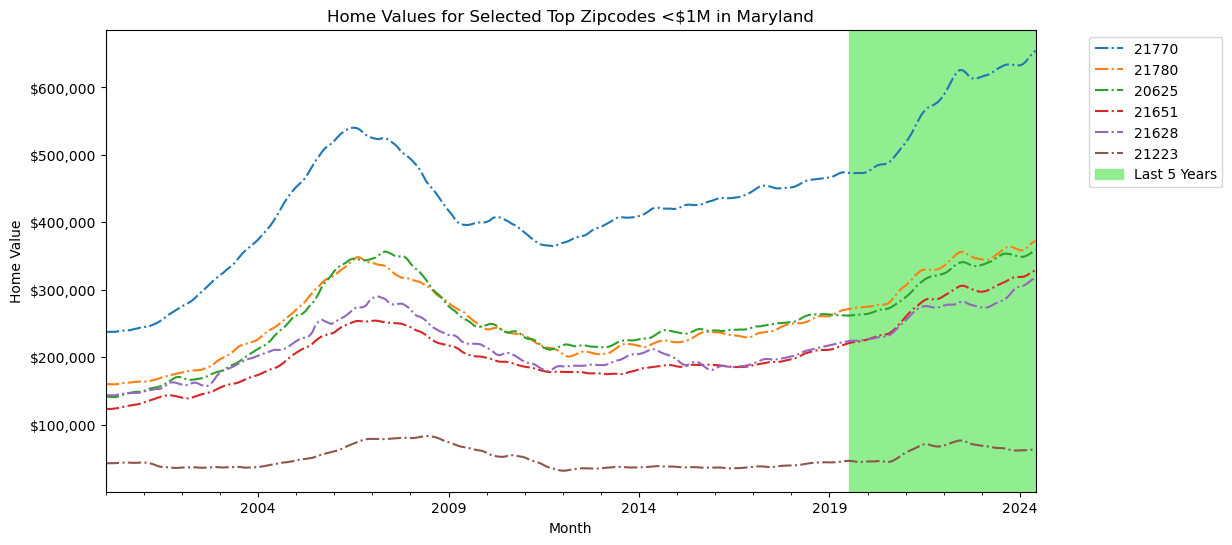

In [137]:
# Visualize Change in Value over last 5 years

ax = df_ts[selected_zipcodes.index].plot(legend=False, figsize=(12, 6), style='-.')

# Format price values as currency
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))


## Fill Region from Last 5 Years
time_fmt = '%Y-%m-%d'
ylim = ax.get_ylim()
ax.fill_betweenx(ylim, x1= time_period.strftime(time_fmt), x2=last_date.strftime(time_fmt),
                 color='lightgreen', label='Last 5 Years')
ax.set_ylim(ylim)
ax.legend(bbox_to_anchor=(1.05, 1))

ax.set(title='Home Values for Selected Top Zipcodes <$1M in Maryland', ylabel='Home Value');


In [138]:
# time_period, last_date

## Time Series Modeling

In [140]:
zipcode_list = selected_zipcodes.index.tolist()
zipcode_list

['21770', '21780', '20625', '21651', '21628', '21223']

### ZipCode #1

In [143]:
import plotly.express as px

In [144]:
# Select current zipcode
zipcode = zipcode_list[0]
zipcode

'21770'

In [147]:
# Save zipcode
ts  = df_ts[zipcode].copy()
ts

Month
2000-01-31    237480.827063
2000-02-29    237465.535649
2000-03-31    237352.724156
2000-04-30    237599.199000
2000-05-31    238422.427999
                  ...      
2024-02-29    634752.320688
2024-03-31    639066.757896
2024-04-30    645540.609380
2024-05-31    650964.392366
2024-06-30    654502.832470
Name: 21770, Length: 294, dtype: float64

In [150]:
len(ts)

294

294 time lags is a lot to use...

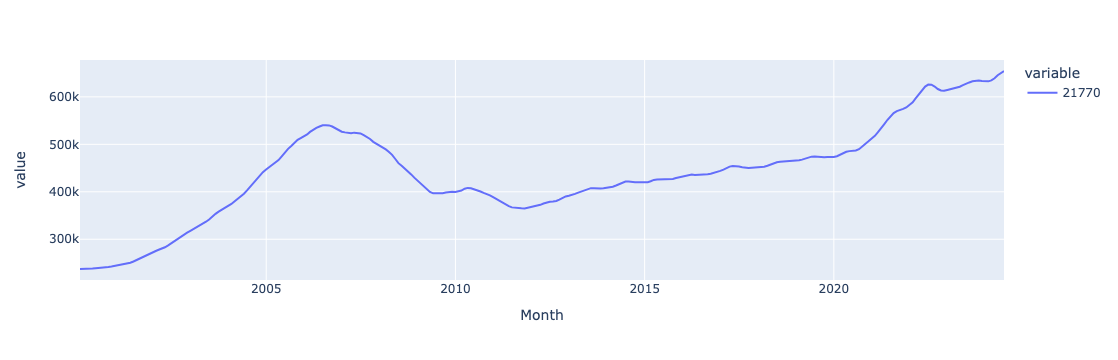

In [149]:
px.line(ts)

Based on trends in the data, will start from 2014 to present day.

In [154]:
plt.rcParams['figure.figsize'] = (12,4)

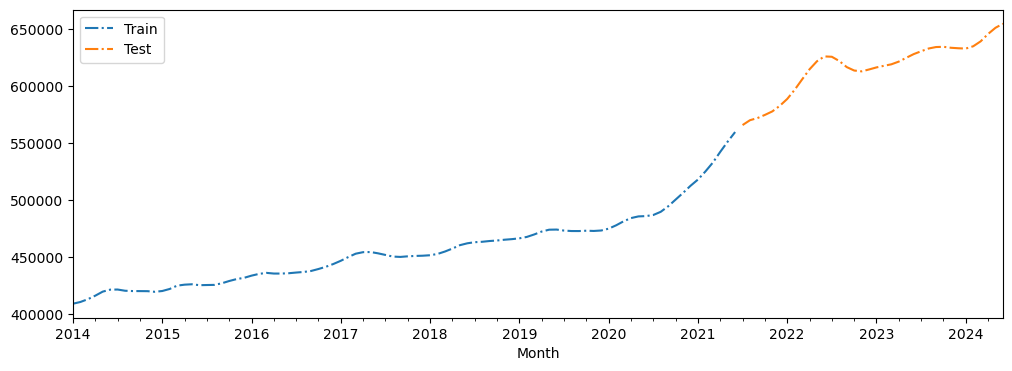

In [159]:
train, test = pm.model_selection.train_test_split(ts.loc['2014':], test_size=12*3)
ax = train.plot(label='Train', style='-.')
test.plot(ax=ax, label='Test', style='-.')
ax.legend();